# **Homework 2_3**

В данной работе определяются координаты фонарика (самого яркого пикселя) на видео и далее мы строим график координат фонарика с течением времени. 
Для начала, обработаем наше видео и сохраним его в матрицу *frames*. 

In [1]:
import numpy as np
import cv2


cap = cv2.VideoCapture("torchvideo.mp4")
res = []
while cap.isOpened():
    ret,frame = cap.read()
    if ret:
        res.append(frame[:,:,::-1])
    else:
        break
frames = np.array(res)

Далее чтобы проверить все ли в порядке, используем функцию display_images, которая показывает лист выбранных нами фотографий. 

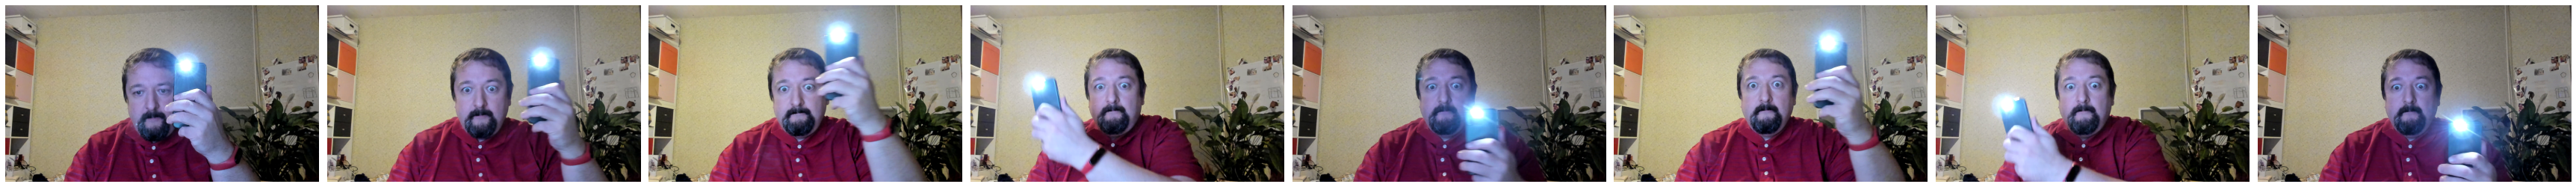

In [2]:
import matplotlib.pyplot as plt


def display_images(l,titles=None,fontsize=12):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

display_images(frames[::40])

Теперь мы сохраняем размеры кадров в переменные. 

После этого переводим наши кадры в черно-белый цвет и также применяем размытие по Гауссу для каждого кадра. Первое делается так как нам не важен цвет и удобнее работать с черно-белыми изображениями, а размытие чтобы избавиться от ненужного шума. 

In [3]:
screen_h = frames.shape[1]
screen_w = frames.shape[2]

bwframes = [cv2.cvtColor(x, cv2.COLOR_BGR2GRAY) for x in frames]
blur_bwframes = [cv2.GaussianBlur(x, (9, 9), 0) for x in bwframes]

Функция get_coords возвращает лист координатов самого яркого пикселя для каждого из кадров. 

In [4]:
def get_coords(frames):
  x_coords = []
  y_coords = []

  for img in frames:
    (minVal, maxVal, minLoc, maxLoc) = cv2.minMaxLoc(img)
    x_coords.append(maxLoc[0])
    y_coords.append(screen_h - maxLoc[1])

  return x_coords, y_coords


x_coords, y_coords = get_coords(blur_bwframes)



Далее мы находим расстояние между каждой координатой найденной выше, чтобы показать изменение скорости движения фонарика на графике. 

In [12]:
import math
from itertools import cycle


def get_dist(coords):
  
  dists = []
  c_coords = iter(coords)

  f_point = next(c_coords)

  while True:

    try:
      s_point = next(c_coords)
      dist = math.dist(f_point, s_point)

      dists.append(dist)
      f_point = s_point

    except Exception:

      dists.append(dist)
      return dists


l = list(zip(x_coords, y_coords))

dist_lst = get_dist(l)
  

Финальный шаг это представить график который описывает движение фонарика (**красная точка обозначает начало движения**). Стоит отметить, что размер точек зависит от скорости фонарика в тот момент и можно определить где человек с фонариком задержал его, а где ускорил.

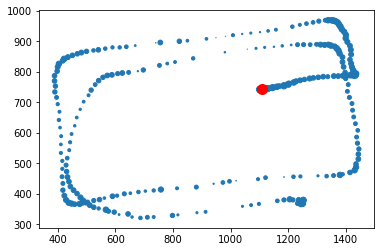

In [19]:
default_len = 20
max_val = max(dist_lst)
velocity_lst = [default_len * (max_val - x)**0.19 - x for x in dist_lst]

plt.scatter(x_coords, y_coords, velocity_lst)
plt.scatter(x_coords[0], y_coords[0], color='red', s=100)
plt.show()